In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline 

In [3]:
df = pd.read_csv('/Users/soaadaljafr/Downloads/superstore_dataset2011-2015.csv') 


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [178]:
df.head()
df.columns
df.dtypes


Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date                 object
Ship Mode                 object
Customer_ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [7]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
df.shape

(51290, 24)

In [9]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288         Ju�rez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [10]:
df.rename(columns={'Customer ID' : 'Customer_ID'}, inplace=True)

In [11]:
df.Customer_ID.unique

<bound method Series.unique of 0        TB-11280
1        JH-15985
2          AT-735
3        EM-14140
4        JH-15985
           ...   
51285    EB-13975
51286     LP-7095
51287    CM-12190
51288    TD-20995
51289    JM-15580
Name: Customer_ID, Length: 51290, dtype: object>

In [12]:
df.Customer_ID.tail()

51285    EB-13975
51286     LP-7095
51287    CM-12190
51288    TD-20995
51289    JM-15580
Name: Customer_ID, dtype: object

In [13]:
df['Customer_ID'].max()

'ZD-21925'

In [138]:
#What is the best salling catogry our customer like?


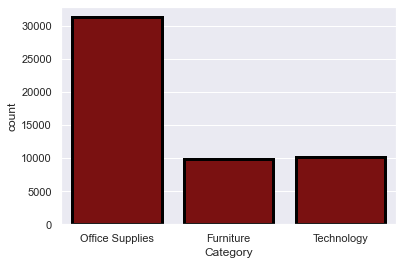

In [202]:
sns.countplot(x='Category',  data=df, ec='black', lw=3, palette=['darkred']);

In [15]:
df.groupby('Category').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Category,,,,,,,
Furniture,241487920,118196026.0,4.110874e+06,34954,1660.030,285204.72380,440320.66
Office Supplies,815386724,330772872.0,3.787070e+06,108182,4297.190,518473.83430,405451.29
Technology,258483051,102603754.0,4.744557e+06,35176,1372.508,663778.73318,507048.74


In [16]:
df.Category.value_counts()#.agg('max')


Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [17]:
df.Category.unique

<bound method Series.unique of 0        Office Supplies
1        Office Supplies
2        Office Supplies
3        Office Supplies
4              Furniture
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: Category, Length: 51290, dtype: object>

In [18]:
import seaborn as sns

In [19]:

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [56]:
df2 = df.sort_values(by="Category", ascending=False).head()

In [57]:
name = df['Category']
pp1 = df['Quantity']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))


# Show Plot
plt.show()

<Figure size 720x504 with 0 Axes>

In [22]:
#what the best product comes Profit to the company?

In [23]:
df.rename(columns={'Product Name' : 'Product_Name'}, inplace=True)

In [24]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [25]:
df.Profit.unique

<bound method Series.unique of 0        106.1400
1         36.0360
2         29.6400
3        -26.0550
4         37.7700
           ...   
51285      4.5188
51286      0.4200
51287     12.3600
51288      0.5600
51289     -0.6048
Name: Profit, Length: 51290, dtype: float64>

In [26]:
df.Profit.isna().sum()

0

In [219]:
df.groupby(["Product_Name"])['Profit'].max().reset_index().sort_values('Profit',ascending = False).head(4)

,Product_Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,8399.9760
1498,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
1974,Ibico EPK-21 Electric Binding System,4630.4755
1926,"Hoover Stove, Red",3979.0800


In [225]:
S= df["Product_Name"].apply(lambda x:"Canon" if "Canon imageCLASS 2200 Advanced Copier" in x else x)
df["Product_Name"]=S

In [238]:
O=df["Product_Name"].apply(lambda x:"GBC System" if "Ibico EPK-21 Electric Binding System" in x else x)
df["Product_Name"]=O

In [239]:
a=df["Product_Name"].apply(lambda x:"Ibico System" if "Ibico Electric Binding System" in x else x)
df["Product_Name"]=a

In [236]:
d=df["Product_Name"].apply(lambda x:"Hoover Stove" if "Hoover Stove, Red" in x else x)
df["Product_Name"]=d

In [212]:
df.Product_Name.value_counts()GBC System

Staples                                                         227
Cardinal Index Tab, Clear                                        92
Eldon File Cart, Single Width                                    90
Rogers File Cart, Single Width                                   84
Ibico Index Tab, Clear                                           83
                                                               ... 
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs      1
I.R.I.S IRISCard Anywhere 5 Card Scanner                          1
Epson Perfection V600 Photo Scanner                               1
Xerox Blank Computer Paper                                        1
NeatDesk Desktop Scanner & Digital Filing System                  1
Name: Product_Name, Length: 3788, dtype: int64

In [ ]:
df.rename(columns={'Customer ID' : 'Customer_ID'}, inplace=True)

In [28]:
df.Profit.value_counts()

 0.0000     668
 4.3200      70
 3.9600      69
 7.9200      67
 2.6400      63
           ... 
 66.0736      1
-6.1650       1
-2.2140       1
 20.8400      1
 2.3571       1
Name: Profit, Length: 24575, dtype: int64

<AxesSubplot:title={'center':'the best product'}, xlabel='Product_Name', ylabel='Profit'>

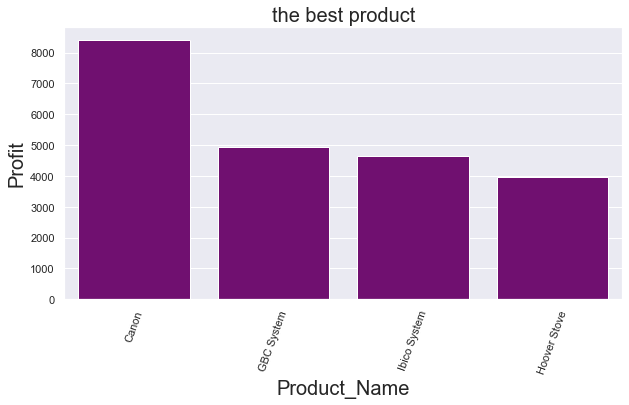

In [240]:
best = df.groupby(["Product_Name"])['Profit'].max().reset_index().sort_values('Profit',ascending = False).head(4)
fig = plt.figure(figsize =(10, 5))
plt.title('the best product',fontsize=20)
plt.xticks(rotation=70)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Profit',fontsize=20)
sns.barplot(x = "Product_Name",y= "Profit",data=best,color='purple')



In [180]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [198]:
best_year = df.groupby(['Order Date'])['Profit'].value_counts()
best_year

Order Date  Profit  
2011-01-01  -26.055     1
             15.342     1
             29.640     1
             36.036     1
             37.770     1
                       ..
2014-12-31   166.440    1
             180.240    1
             216.720    1
             251.400    1
             301.466    1
Name: Profit, Length: 50867, dtype: int64

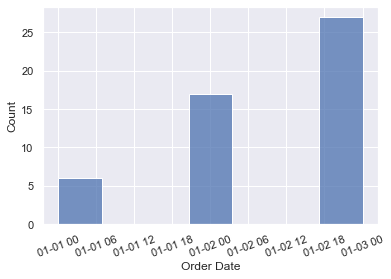

In [201]:
plt.xticks(rotation=20)
sns.histplot(x='Order Date', data=best_year.head(50));

In [30]:
#most customer in which city?

In [31]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288         Ju�rez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [32]:
df['City'] = df['City'].str.replace('[^A-Za-z0-9 ]', "")

In [33]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288          Jurez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [34]:
df.City.value_counts()

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Victoria Falls      1
Crtama              1
Antioch             1
Manhattan           1
Edirne              1
Name: City, Length: 3635, dtype: int64

In [174]:
df.State.value_counts().head(10)

California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: State, dtype: int64

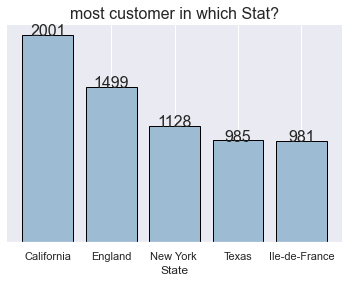

In [149]:
State = ['California', 'England', 'New York ', 'Texas', 'Ile-de-France']
counts = [2001, 1499, 1128, 985, 981]

plt.bar(State, counts, edgecolor='black', color='xkcd:light gray blue')

for i, g in enumerate(counts):
    plt.text(i, g-8, f'{g}', ha='center', fontsize=16)
    
plt.xlabel('State')
plt.yticks([])
plt.title('most customer in which Stat?',fontsize=16)
sns.despine(left=True)

In [120]:
df2 = df.City.value_counts().agg(max)